In [56]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [57]:
df = pd.read_csv('English_Saudi_Social_Bank_Data_2015-2020.csv')

In [58]:
df.head()

,bank_branch,loan_type,loan_classification,customer_sector,loan_value,installment,gender,age,social_status,special_needs,family_members,saving_loan,income_value,Year,Month
0,Madinah,Social,Marrage,Govrenmental_Company_Employee,60000.0,>= 1000,MALE,>= 30,Married,No,>= 02,No,>= 5000,2015,1
1,Madinah,Social,Marrage,Govrenment_Employee,60000.0,< 1000,MALE,>= 30,Married,Yes,>= 02,No,>= 5000,2015,1
2,Madinah,Social,Marrage,Govrenment_Employee,60000.0,< 1000,MALE,< 30,Married,No,>= 02,No,< 5000,2015,6
3,Madinah,Social,Marrage,Govrenment_Employee,60000.0,< 1000,MALE,< 30,Married,No,>= 02,No,>= 10000,2015,6
4,Madinah,Social,Family,NaN,60000.0,< 1000,FEMALE,>= 40,Widower,No,>= 05,No,< 5000,2015,6


In [59]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736683 entries, 0 to 736682
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   bank_branch          736683 non-null  object 
 1   loan_type            736683 non-null  object 
 2   loan_classification  736683 non-null  object 
 3   customer_sector      497463 non-null  object 
 4   loan_value           736683 non-null  float64
 5   installment          736683 non-null  object 
 6   gender               736683 non-null  object 
 7   age                  731346 non-null  object 
 8   social_status        736683 non-null  object 
 9   special_needs        736683 non-null  object 
 10  family_members       735871 non-null  object 
 11  saving_loan          736683 non-null  object 
 12  income_value         710276 non-null  object 
 13  Year                 736683 non-null  int64  
 14  Month                736683 non-null  int64  
dtypes: float64(1), in

In [60]:
for i in df.columns:
    print(i," : " ,df[i].unique())


bank_branch  :  ['Madinah' 'AlKharj' 'Tabuk' 'Ryiadh' 'Taif' 'Hail' 'Jeddah' 'Alquriat'
 'Bishah' 'Yunbu' 'Buridah' 'Arar' 'AlQunfuthah' 'ALAhsa' 'AlDawadmi'
 'حفر الباطن' 'AlJouf' 'WadiAldawasir' 'ALBaha' 'Najran' 'AlMajmaah'
 'Dammam' 'Makkah' 'KhamisMishiat' 'Jazan' 'AlNamas' 'AlRas']
loan_type  :  ['Social' 'Project' 'Transmition' 'Individual' 'Business']
loan_classification  :  ['Marrage' 'Family' 'Nashi' 'Wages' 'Restoration' 'VIP' 'Khotwah_Mutnahi'
 'Inovation' 'School_Transmition' 'Communications' 'Alqaim' 'Private'
 'Foodtruck' 'Hall' 'Emtiyaz']
customer_sector  :  ['Govrenmental_Company_Employee' 'Govrenment_Employee' nan
 'Private_Sector_Employee' 'Govrenment_Retired' 'Mutsabib'
 'Tamynaat_Retired' 'BelongTo_Association ' 'Undefined']
loan_value  :  [ 60000. 204970.  50000. ... 357000. 427000. 144333.]
installment  :  ['>= 1000' '< 1000']
gender  :  ['MALE' 'FEMALE']
age  :  ['>= 30' '< 30' '>= 40' '>= 60' nan]
social_status  :  ['Married' 'Widower' 'Single' 'Divorced' 'Alon

In [61]:
df['bank_branch'] = df['bank_branch'].replace({'حفر الباطن':'Hafar Al-Batin'})

In [62]:
df.isnull().sum()

bank_branch                 0
loan_type                   0
loan_classification         0
customer_sector        239220
loan_value                  0
installment                 0
gender                      0
age                      5337
social_status               0
special_needs               0
family_members            812
saving_loan                 0
income_value            26407
Year                        0
Month                       0
dtype: int64

In [63]:
df.describe()

,loan_value,Year,Month
count,7.366830e+05,736683.000000,736683.000000
mean,6.114274e+04,2016.267686,6.169176
std,4.114368e+04,1.455207,3.500512
min,2.750000e+03,2015.000000,1.000000
25%,6.000000e+04,2015.000000,3.000000
50%,6.000000e+04,2016.000000,6.000000
75%,6.000000e+04,2017.000000,9.000000
max,4.000000e+06,2020.000000,12.000000


In [64]:
df.describe(include=object)

,bank_branch,loan_type,loan_classification,customer_sector,installment,gender,age,social_status,special_needs,family_members,saving_loan,income_value
count,736683,736683,736683,497463,736683,736683,731346,736683,736683,735871,736683,710276
unique,27,5,15,8,2,2,4,5,2,4,2,4
top,Ryiadh,Social,Marrage,Govrenment_Employee,>= 1000,MALE,>= 30,Married,No,>= 02,No,< 5000
freq,96564,626634,379985,214886,383971,637249,247872,630847,685272,480912,700806,235334


In [65]:
df.drop(['customer_sector' , 'Year' , 'Month'] , inplace=True , axis=1)

In [66]:
df.dropna(inplace=True)
df.isna().sum()

bank_branch            0
loan_type              0
loan_classification    0
loan_value             0
installment            0
gender                 0
age                    0
social_status          0
special_needs          0
family_members         0
saving_loan            0
income_value           0
dtype: int64

Text(0.5, 1.0, 'Counts of loan classification.')

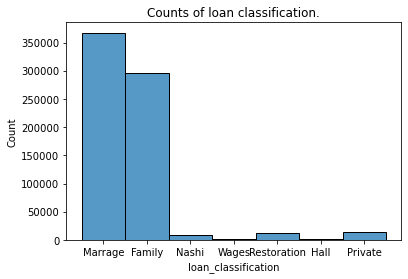

In [67]:
dt = df[df['loan_classification'].isin(['Marrage','Family','Private','Restoration','Nashi','Wages','Hall'])]
sns.histplot(df,x=dt.loan_classification)
plt.title("Counts of loan classification.")

Text(0.5, 1.0, 'Counts of loan types.')

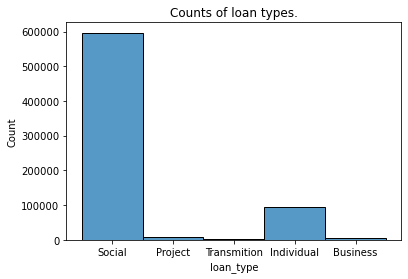

In [68]:
sns.histplot(df,x='loan_type')
plt.title("Counts of loan types.")

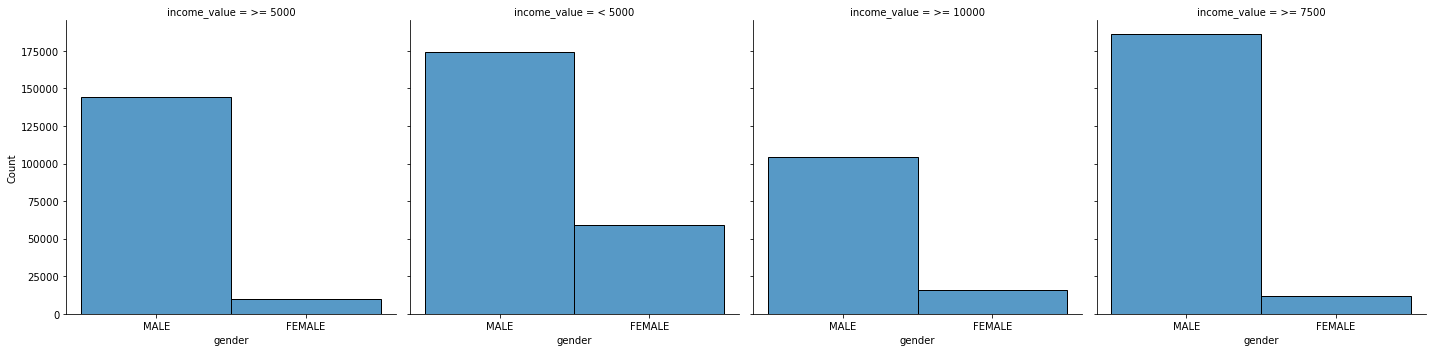

In [69]:
sns.displot(df,x='gender',col='income_value')

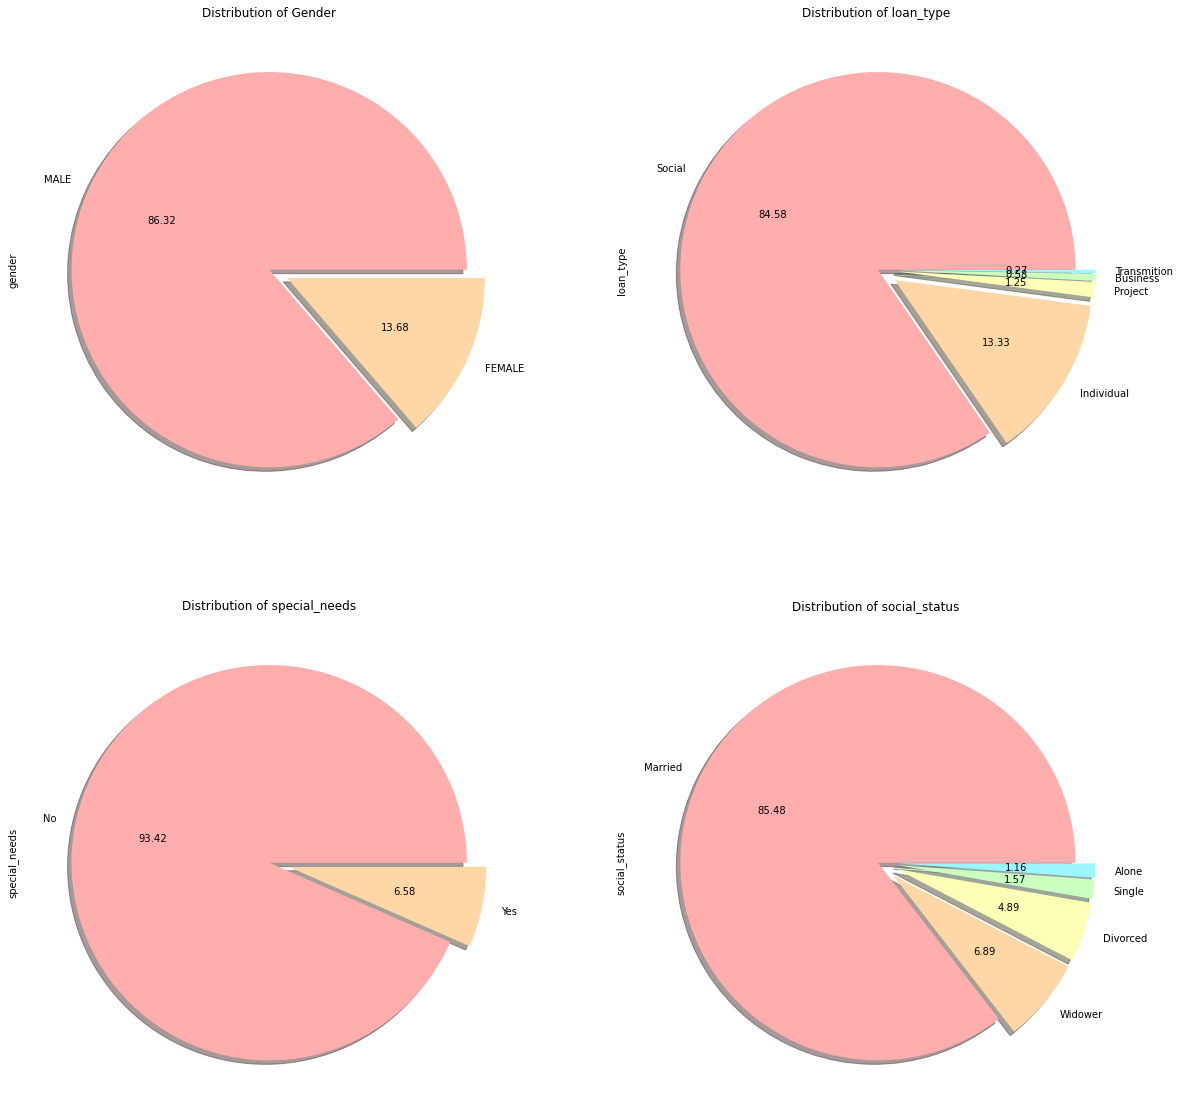

In [70]:
f, ax  = plt.subplots(2,2,figsize = (20,20))
colors =['#FFADAD', '#FFD6A5', '#FDFFB6', '#CAFFBF', '#9BF6FF', '#A0C4FF', '#BDB2FF', '#FFC6FF']
df['gender'].value_counts().plot.pie(title='Distribution of Gender',explode=[0,.1],
ax=ax[0][0],autopct="%.2f",shadow = True,colors =colors)

df['loan_type'].value_counts().plot.pie(title='Distribution of loan_type ',explode=[0, .1, .1, .1, .1],
 ax=ax[0][1],autopct="%.2f",shadow = True,colors = colors)

df['special_needs'].value_counts().plot.pie(title='Distribution of special_needs',explode=[0,.1],
ax=ax[1][0],autopct="%.2f",shadow = True,colors = colors)

df['social_status'].value_counts().plot.pie(title='Distribution of social_status ',
ax=ax[1][1],explode=[0,.1,.1,.1,.1],autopct="%.2f",shadow = True,colors=colors)
f.patch.set_facecolor('white')
plt.show()

<AxesSubplot:title={'center':' age '}>

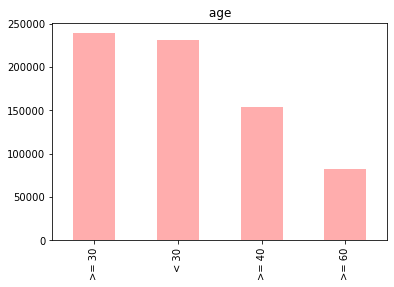

In [71]:
df['age'].value_counts().plot.bar(title=' age ',  color=['#FFADAD'])

In [72]:
one = ce.OneHotEncoder()
dt = ce.OneHotEncoder(cols=['bank_branch' , 'loan_classification']).fit_transform(df)


In [73]:
dt = ce.OrdinalEncoder(cols=['installment' , 'gender' , 'age' , 'social_status' , 'special_needs' , 'family_members' , 'saving_loan' , 'income_value' , 'loan_type']).fit_transform(dt)

In [74]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705274 entries, 0 to 736682
Data columns (total 52 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   bank_branch_1           705274 non-null  int64  
 1   bank_branch_2           705274 non-null  int64  
 2   bank_branch_3           705274 non-null  int64  
 3   bank_branch_4           705274 non-null  int64  
 4   bank_branch_5           705274 non-null  int64  
 5   bank_branch_6           705274 non-null  int64  
 6   bank_branch_7           705274 non-null  int64  
 7   bank_branch_8           705274 non-null  int64  
 8   bank_branch_9           705274 non-null  int64  
 9   bank_branch_10          705274 non-null  int64  
 10  bank_branch_11          705274 non-null  int64  
 11  bank_branch_12          705274 non-null  int64  
 12  bank_branch_13          705274 non-null  int64  
 13  bank_branch_14          705274 non-null  int64  
 14  bank_branch_15      

In [89]:
x = dt.drop('gender',axis=1)
y = dt['gender']

In [90]:
scalar = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [91]:
lg.fit(X_train , y_train)
y_pred = lg.predict(X_test)

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98    182660
           2       0.90      0.89      0.89     28923

    accuracy                           0.97    211583
   macro avg       0.94      0.94      0.94    211583
weighted avg       0.97      0.97      0.97    211583



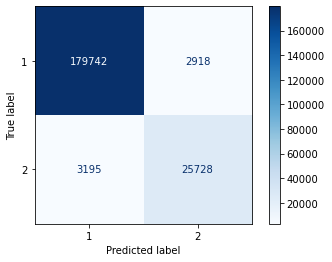

In [93]:
plot_confusion_matrix(lg, X=X_test, y_true=y_test, cmap='Blues');

In [83]:
df['loan_type'] = df['loan_type'].replace({'Social':0,'Project':1,'Transmition':2,'Individual':3,'Business':4})
df['gender'] = df['gender'].replace({'MALE':0, 'FEMALE':1})
df['loan_classification'] = df['loan_classification'].replace({'Marrage':0, 'Family':1, 'Nashi':2, 'Wages':3, 'Restoration':4, 'VIP':5,
       'Khotwah_Mutnahi':6, 'Inovation':7, 'School_Transmition':8,
       'Communications':9, 'Alqaim':10, 'Private':11, 'Foodtruck':12, 'Hall':13,
       'Emtiyaz':14})
df['installment'] = df['installment'].replace({'>= 1000':0, '< 1000':1})
df['age'] = df['age'].replace({'>= 30':0, '< 30':1, '>= 40':2, '>= 60':3})
df['social_status'] = df['social_status'].replace({'Married':0, 'Widower':1, 'Single':2, 'Divorced':3, 'Alone':4})
df['special_needs'] = df['special_needs'].replace({'No':0, 'Yes':1})
df['family_members'] = df['family_members'].replace({'>= 02':0, '>= 05':1, '>= 10':2, '< 02':3})
df['saving_loan'] = df['saving_loan'].replace({'No':0, 'Yes':1})
df['income_value'] = df['income_value'].replace({'>= 5000':0, '< 5000':1, '>= 10000':2,'>= 7500':3})
df['bank_branch'] = df['bank_branch'].replace({'Madinah':0, 'AlKharj':1, 'Tabuk':2, 'Ryiadh':3, 'Taif':4, 'Hail':5, 'Jeddah':6,
       'Alquriat':7, 'Bishah':8, 'Yunbu':9, 'Buridah':10, 'Arar':11, 'AlQunfuthah':12,
       'ALAhsa':13, 'AlDawadmi':14, 'AlJouf':15, 'WadiAldawasir':16,
       'ALBaha':17, 'Najran':18, 'AlMajmaah':19, 'Dammam':20, 'Makkah':21,
       'KhamisMishiat':22, 'Jazan':23, 'AlNamas':24, 'AlRas':25,'Hafar Al-Batin':26})
DF=df.copy()
X=DF.drop(columns=['family_members'])
y=DF['family_members']

In [84]:
rfc = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89    138936
           1       0.61      0.70      0.65     48158
           2       0.41      0.16      0.23     15377
           3       0.96      0.95      0.96      9112

    accuracy                           0.80    211583
   macro avg       0.72      0.68      0.68    211583
weighted avg       0.79      0.80      0.79    211583

[[125307  12459   1027    143]
 [ 12049  33576   2361    172]
 [  3938   8950   2401     88]
 [   171    195     49   8697]]


In [85]:
feature = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature

loan_classification    0.480411
age                    0.203991
loan_value             0.091390
bank_branch            0.070442
social_status          0.046006
loan_type              0.028992
income_value           0.026535
gender                 0.024526
installment            0.017105
saving_loan            0.006908
special_needs          0.003695
dtype: float64

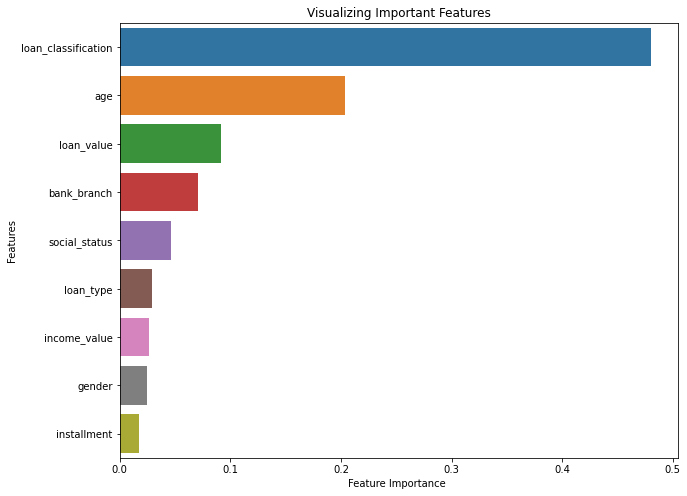

In [86]:
plt.figure(figsize=(10,8))
sns.barplot(x=feature[:9], y=feature.index[:9])
plt.xlabel('Feature Importance ')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()